* MAC

# 라이브러리 설치

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

# Preview

In [4]:
train = pd.read_csv("/Users/cho/data/HRdata/aug_train.csv")

In [6]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Null값 확인

In [7]:
#NULL과 타입 정보
print(train.info())
print('*'*100)
print(train.isnull().sum().to_frame().sort_values(by=0, ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

* company_type, company_size, gender, major_discipline에 유독 null값이 많다.

## 변수별 유니크 정보 확인

In [8]:
#유니크 정보
for col in train:
    if len(train[col].unique()) <= 30:
        print(f'{col} : {len(train[col].unique())}, {train[col].unique()}')
    else:
        print(f'{col} : {len(train[col].unique())}')

enrollee_id : 19158
city : 123
city_development_index : 93
gender : 4, ['Male' nan 'Female' 'Other']
relevent_experience : 2, ['Has relevent experience' 'No relevent experience']
enrolled_university : 4, ['no_enrollment' 'Full time course' nan 'Part time course']
education_level : 6, ['Graduate' 'Masters' 'High School' nan 'Phd' 'Primary School']
major_discipline : 7, ['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
experience : 23, ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
company_size : 9, [nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
company_type : 7, [nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
last_new_job : 7, ['1' '>4' 'never' '4' '3' '2' nan]
training_hours : 241
target : 2, [1. 0.]


* 범주형 변수 기준, 분포 먼저 확인

In [7]:
#유니크 값이 너무 많은 변수는 제외
tooManyUnique = ["enrollee_id", "city", "city_development_index", "training_hours"]
Category = [col for col in train.columns if col not in tooManyUnique]

## 분포확인

### 범주형변수

In [17]:
print(f'유니크 값이 30개 이하인 변수의 개수 : {len(Category)}개')

유니크 값이 30개 이하인 변수의 개수 : 10개


<AxesSubplot:xlabel='gender', ylabel='count'>

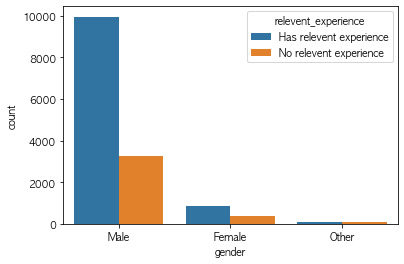

In [8]:
sns.countplot(x=Category[0], hue=Category[1] , data=train)

<AxesSubplot:xlabel='education_level', ylabel='count'>

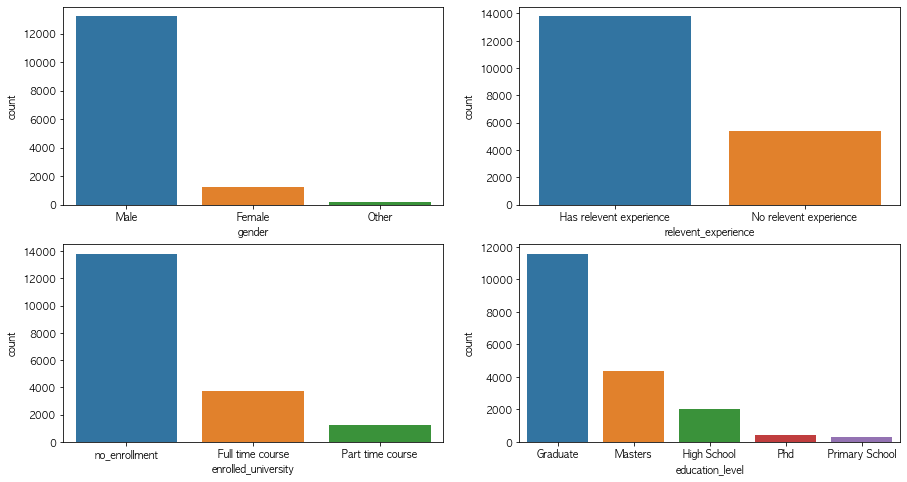

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

sns.countplot(ax=axes[0,0], x=Category[0], data=train)
sns.countplot(ax=axes[0,1], x=Category[1], data=train)
sns.countplot(ax=axes[1,0], x=Category[2], data=train)
sns.countplot(ax=axes[1,1], x=Category[3], data=train)

* 변수별로 불균형이 심하다. 
    * 남자가 많다. / 관련 경험이 있는 사람들이 많다. / 현재 대학을 다니지 않는 사람들이 많다. / 대졸자가 제일 많다.

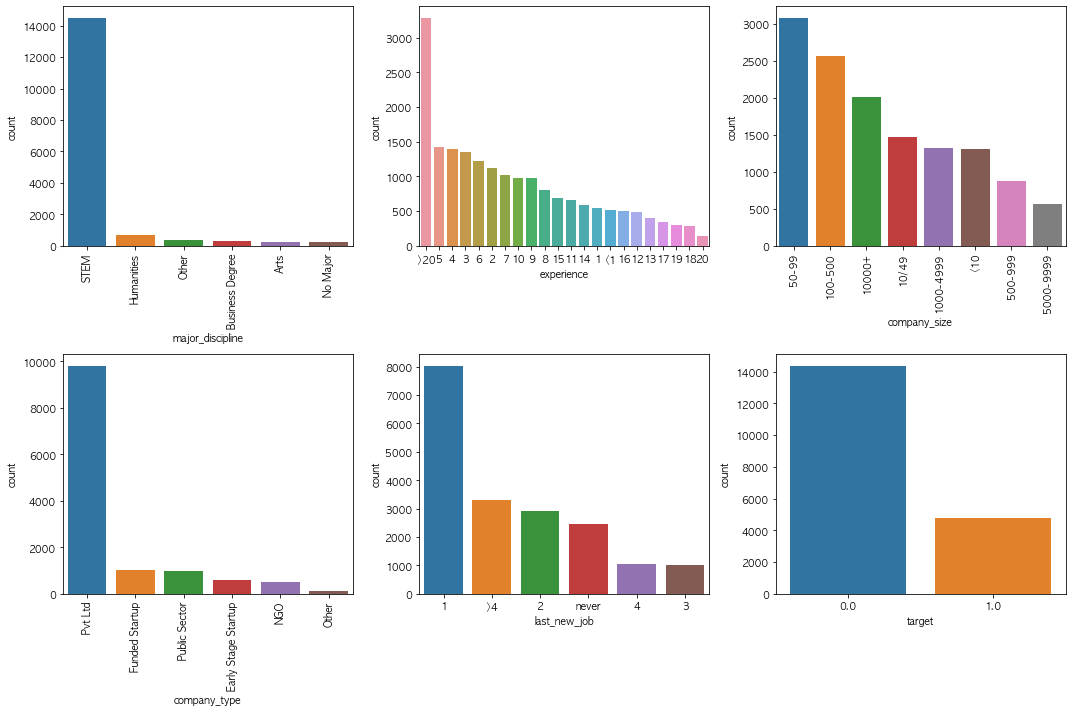

In [67]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(ax=axes[0,0], x=Category[4], data=train, order = train[Category[4]].value_counts().index)
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=90)
sns.countplot(ax=axes[0,1], x=Category[5], data=train, order = train[Category[5]].value_counts().index)
sns.countplot(ax=axes[0,2], x=Category[6], data=train, order = train[Category[6]].value_counts().index)
axes[0,2].set_xticklabels(axes[0,2].get_xticklabels(), rotation=90)
sns.countplot(ax=axes[1,0], x=Category[7], data=train, order = train[Category[7]].value_counts().index)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90)
sns.countplot(ax=axes[1,1], x=Category[8], data=train, order = train[Category[8]].value_counts().index)
sns.countplot(ax=axes[1,2], x=Category[9], data=train, order = train[Category[9]].value_counts().index)

fig.tight_layout()

* 역시 변수별로 불균형이 크다
    * 대부분이 과학 기술 전공이네.. 
    * 경력이 20년 이상인 사람들이 이렇게 많다구??
    * 중소기업과 만명 이상의 대기업 다니는 사람들이 많네
    * Pvt Ltd는 그냥 사기업인가??
    * 새직업을 구한지 1년 미만인 사람들이 가장 많다.
    * 1이 새로 구직을 희망하는 사람인데, 새로운 구직을 희망하지 않는 사람들이 더 많은듯?

### 준범주형변수(연속형, 범주형 모호)